In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
hospitals = pd.read_csv('../data/hospital_data_clean.csv', dtype={'facility_id': object, 'zip': object})

In [134]:
# Drop hospitals with less than 15 discharges and patient revenue reporting anomalies.
hospitals = hospitals.loc[(hospitals['total_discharges_for_adults_and_peds'] >= 15)]

In [135]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,doctor_communication,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,92.0,82.0,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,88.0,72.0,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,90.0,82.0,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,91.0,82.0,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,93.0,89.0,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,140010,NORTHSHORE UNIVERSITY HEALTHSYSTEM,2650 RIDGE AVENUE,EVANSTON,IL,60201,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,91.0,83.0,74.0,88.0,81.0,86.0,84.0,88.0,87.0,24.0
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,89.0,85.0,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,90.0,83.0,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,91.0,78.0,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0


In [136]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4490 entries, 0 to 4513
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   facility_id                            4490 non-null   object 
 1   name                                   4490 non-null   object 
 2   address                                4488 non-null   object 
 3   city                                   4490 non-null   object 
 4   state                                  4490 non-null   object 
 5   zip                                    4490 non-null   object 
 6   rural_or_urban                         4490 non-null   object 
 7   facility_type                          4490 non-null   object 
 8   provider_type                          4490 non-null   object 
 9   type_of_control                        4490 non-null   object 
 10  total_discharges_for_adults_and_peds   4490 non-null   float64
 11  total_cos

In [137]:
hospitals.value_counts('state')

state
TX    366
CA    319
FL    177
IL    166
PA    154
OH    153
NY    146
GA    127
KS    126
WI    126
MI    126
MN    124
IN    114
IA    112
OK    111
LA    107
NC    103
MO    101
TN     94
KY     89
WA     87
MS     87
NE     87
CO     86
AL     86
VA     82
AZ     77
AR     70
NJ     63
MT     60
MA     59
OR     57
SD     57
SC     54
PR     48
UT     46
WV     46
MD     44
ND     44
ID     42
NM     37
NV     34
ME     31
CT     28
WY     26
NH     26
AK     21
HI     21
VT     14
RI     10
DE      7
DC      7
GU      2
VI      2
MP      1
Name: count, dtype: int64

In [138]:
hospitals.value_counts('rural_or_urban')

rural_or_urban
Rural    2416
Urban    2074
Name: count, dtype: int64

In [139]:
hospitals.value_counts('ruca_desc')

ruca_desc
Metropolitan area core: primary flow within an urbanized area of 50,000 and greater                     2080
Micropolitan area core: primary flow within an urban cluster of 10,000 to 49,999                         487
Small town core: primary flow within an urban cluster of 2,500 to 9,999                                  190
Metropolitan area high commuting: primary flow 30% or more to a urbanized area of 50,000 and greater     105
Secondary flow 30% to <50% to a urbanized area of 50,000 and greater                                      97
Rural areas: primary flow to a tract outside a urbanized area of 50,000 and greater or UC                 44
Micropolitan high commuting: primary flow 30% or more to a urban cluster of 10,000 to 49,999              24
Unknown                                                                                                   12
Small town high commuting: primary flow 30% or more to a urban cluster of 2,500 to 9,999                  11
Metropoli

In [140]:
hospitals.value_counts('facility_type').head(3)

facility_type
Short-term Hospitals         3076
Critical Access Hospitals    1343
Children’s Hospitals           63
Name: count, dtype: int64

In [141]:
hospitals.value_counts('provider_type')

provider_type
General Short Term    4426
Children                63
Other                    1
Name: count, dtype: int64

In [142]:
hospitals.value_counts('type_of_control')

type_of_control
Voluntary Non-Profit - Other        2200
Proprietary - Corporation            636
Voluntary Non-Profit - Church        546
Governmental - County                331
Governmental - Hospital District     329
Proprietary - Partnership             81
Governmental - City/County            75
Governmental - Other                  71
Governmental - State                  62
Governmental - City                   58
Proprietary - Other                   52
Governmental - Federal                38
Proprietary - Individual              11
Name: count, dtype: int64

In [143]:
# New column for less specific control type labels.
hospitals.loc[hospitals['type_of_control'].str.contains('Governmental', na=False), 'general_control'] = 'Government'

hospitals.loc[hospitals['type_of_control'].str.contains('Non-Profit', na=False), 'general_control'] = 'Non-Profit'

hospitals.loc[hospitals['type_of_control'].str.contains('Proprietary', na=False), 'general_control'] = 'Proprietary'

In [144]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0,Non-Profit
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,72.0,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0,Government
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0,Non-Profit
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0,Non-Profit
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,89.0,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,140010,NORTHSHORE UNIVERSITY HEALTHSYSTEM,2650 RIDGE AVENUE,EVANSTON,IL,60201,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,83.0,74.0,88.0,81.0,86.0,84.0,88.0,87.0,24.0,Non-Profit
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,85.0,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0,Non-Profit
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,83.0,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0,Government
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,78.0,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0,Non-Profit


In [145]:
hospitals.value_counts('general_control')

general_control
Non-Profit     2746
Government      964
Proprietary     780
Name: count, dtype: int64

In [146]:
hospitals.sort_values('total_discharges_for_adults_and_peds', ascending = False) 

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control
471,330101,NEW YORK PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,NY,10065,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,79.0,75.0,86.0,80.0,84.0,76.0,88.0,88.0,14.0,Non-Profit
4508,360180,CLEVELAND CLINIC HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,44195,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,88.0,83.0,88.0,77.0,90.0,92.0,24.0,Non-Profit
86,440039,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,NASHVILLE,TN,37232,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,85.0,78.0,88.0,84.0,81.0,80.0,90.0,92.0,18.0,Non-Profit
2051,100007,ADVENTHEALTH ORLANDO,601 E ROLLINS ST,ORLANDO,FL,32803,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,81.0,76.0,88.0,82.0,89.0,86.0,89.0,89.0,15.0,Non-Profit
1037,670260,TEXAS HEALTH HOSPITAL FRISCO,12400 N DALLAS PARKWAY,FRISCO,TX,75033,Urban,Short-term Hospitals,General Short Term,Proprietary - Partnership,...,84.0,74.0,87.0,83.0,89.0,89.0,91.0,91.0,14.0,Proprietary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,281303,NIOBRARA VALLEY HOSPITAL,HIGHWAY 12 & FIFTH STREET,LYNCH,NE,68746,Rural,Critical Access Hospitals,General Short Term,Voluntary Non-Profit - Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit
3042,121305,LANAI COMMUNITY HOSPITAL,628 7TH STREET,LANAI,HI,96763,Urban,Critical Access Hospitals,General Short Term,Voluntary Non-Profit - Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit
2345,431324,AVERA WESKOTA MEMORIAL MEDICAL CENTE,604 1ST STREET NE,WESSINGTON SPRINGS,SD,57382,Rural,Critical Access Hospitals,General Short Term,Voluntary Non-Profit - Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit
684,250151,ALLIANCE HEALTH CENTER,5000 HWY 39 NORTH,MERIDIAN,MS,39303,Rural,Short-term Hospitals,General Short Term,Proprietary - Corporation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Proprietary


(array([2.001e+03, 7.210e+02, 4.480e+02, 3.110e+02, 2.330e+02, 1.500e+02,
        1.130e+02, 8.100e+01, 7.700e+01, 5.300e+01, 4.300e+01, 2.400e+01,
        2.400e+01, 2.500e+01, 2.000e+01, 1.700e+01, 1.500e+01, 1.500e+01,
        6.000e+00, 1.600e+01, 1.200e+01, 6.000e+00, 1.100e+01, 4.000e+00,
        4.000e+00, 2.000e+00, 8.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

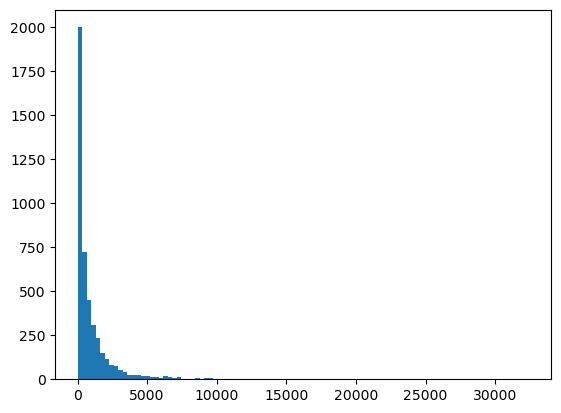

In [147]:
plt.hist(hospitals['total_discharges_for_adults_and_peds'], bins=100)

In [148]:
# New column for discharge bin labels.
hospitals.loc[hospitals['total_discharges_for_adults_and_peds']<50 , 'discharges'] = '<50'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=50) & (hospitals['total_discharges_for_adults_and_peds']<200), 'discharges'] = '50-200'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=200) & (hospitals['total_discharges_for_adults_and_peds']<500), 'discharges'] = '200-500'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=500) & (hospitals['total_discharges_for_adults_and_peds']<1000), 'discharges'] = '500-1000'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=1000) & (hospitals['total_discharges_for_adults_and_peds']<5000), 'discharges'] = '1000-5000'

hospitals.loc[hospitals['total_discharges_for_adults_and_peds']>=5000 , 'discharges'] = '5000+'

In [149]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control,discharges
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0,Non-Profit,5000+
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0,Government,1000-5000
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0,Non-Profit,1000-5000
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0,Non-Profit,5000+
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0,Government,5000+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,140010,NORTHSHORE UNIVERSITY HEALTHSYSTEM,2650 RIDGE AVENUE,EVANSTON,IL,60201,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,74.0,88.0,81.0,86.0,84.0,88.0,87.0,24.0,Non-Profit,5000+
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0,Non-Profit,200-500
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0,Government,1000-5000
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0,Non-Profit,1000-5000


In [150]:
hospitals.value_counts('discharges')

discharges
50-200       1268
1000-5000    1154
200-500      1012
500-1000      768
5000+         154
<50           134
Name: count, dtype: int64

In [151]:
hospitals['avg_charge_pct'] = round(hospitals['charges_per_discharge'] / hospitals['costs_per_discharge'] * 100, 2)

In [152]:
hospitals = hospitals.rename(columns={'charge_pct': 'total_charge_pct'})

In [153]:
hospitals.to_csv('../data/hospitals_final.csv', index=False) 

### Core Question 1: Financial Performance vs. Quality

This directly tests the central hypothesis using the financial metrics against the clinical outcomes and patient rating.

In [154]:
# 1. Calculate Correlation Coefficients (Primary Hypothesis Test)
print("--- Correlation: Financial Margin vs. Quality Scores ---")
# Use Pearson correlation between financial information and key quality scores
correlation_df = hospitals[['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score', 'overall_hospital_rating']]

# Correlation Matrix
corr_matrix = correlation_df.corr()
print(corr_matrix[['mortality_score', 'readmission_score', 'overall_hospital_rating']])

# Example Interpretation:
# A negative correlation between service_margin and mortality_score would suggest
# that hospitals with higher financial margins from patient services tend to have *lower* mortality rates.


--- Correlation: Financial Margin vs. Quality Scores ---
                         mortality_score  readmission_score  \
costs_per_discharge            -0.079701          -0.053989   
charges_per_discharge          -0.126802           0.034735   
avg_charge_pct                 -0.136642           0.146680   
mortality_score                 1.000000           0.205660   
readmission_score               0.205660           1.000000   
overall_hospital_rating        -0.078055          -0.265830   

                         overall_hospital_rating  
costs_per_discharge                     0.008002  
charges_per_discharge                  -0.135704  
avg_charge_pct                         -0.287204  
mortality_score                        -0.078055  
readmission_score                      -0.265830  
overall_hospital_rating                 1.000000  


### Core Question 2: Hospital Size & Type vs. Costs & Quality

This leverages created categorical columns (general_control and discharges) to identify structural differences.

In [156]:
# 2. Analyze Costs and Quality by Hospital Ownership Type
ownership_summary = hospitals.groupby('general_control').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).sort_values(by='median_charge_pct_per_discharge', ascending=False)

print("\n--- Summary by Hospital Ownership Type (General Control) ---")
print(ownership_summary)

# 3. Analyze Costs and Quality by Hospital Size (Discharge Bins)
size_summary = hospitals.groupby('discharges').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_service_margin=('service_margin', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).reindex(['<50', '50-200', '200-500', '500-1000', '1000-5000', '5000+'])

print("\n--- Summary by Hospital Size (Discharge Categories) ---")
print(size_summary)


--- Summary by Hospital Ownership Type (General Control) ---
                 median_charge_pct_per_discharge  median_cost_per_discharge  \
general_control                                                               
Proprietary                              622.215                 228105.920   
Non-Profit                               347.710                 216464.085   
Government                               194.415                 182116.770   

                 median_charge_per_discharge  median_mortality_score  \
general_control                                                        
Proprietary                      1485895.975                     4.2   
Non-Profit                        757982.600                     4.1   
Government                        369249.470                     4.4   

                 median_readmission_score  median_overall_rating  count  
general_control                                                          
Proprietary                      

### Core Question 3: Patient Satisfaction vs. Other Metrics

This explores the HCAHPS data and its relationship with clinical outcomes and financials.

In [157]:
# 4. Correlation: Patient Experience vs. Clinical/Financial
satisfaction_metrics = ['overall_hospital_rating', 'nurse_communication', 'doctor_communication', 'staff_responsiveness',	'discharge_information', 'care_transition',	'cleanliness', 'quietness', 'recommend_hospital']
clinical_financial_metrics = ['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score']

print("\n--- Correlation: Patient Satisfaction vs. Clinical/Financial ---")
satisfaction_corr = hospitals[satisfaction_metrics + clinical_financial_metrics].corr()
# Show how the key HCAHPS measures correlate with the other metrics
print(satisfaction_corr.loc[satisfaction_metrics, clinical_financial_metrics])

# 5. Top/Bottom Analysis (For High-Impact Visuals)
# Example: Find the hospitals that excel in both margin and quality
top_hospitals = hospitals.nlargest(10, ['overall_hospital_rating']) 
bottom_hospitals = hospitals.nsmallest(10, ['mortality_score']) # Lowest is best

print("\n--- Top 10 Hospitals by Patient Rating ---")
print(top_hospitals[['name', 'state', 'overall_hospital_rating', 'mortality_score', 'readmission_score']])


--- Correlation: Patient Satisfaction vs. Clinical/Financial ---
                         costs_per_discharge  charges_per_discharge  \
overall_hospital_rating             0.008002              -0.135704   
nurse_communication                -0.016963              -0.167485   
doctor_communication               -0.015016              -0.200512   
staff_responsiveness               -0.021703              -0.164334   
discharge_information               0.013063              -0.166615   
care_transition                     0.004727              -0.149265   
cleanliness                        -0.039422              -0.122745   
quietness                          -0.032839              -0.097350   
recommend_hospital                  0.024966              -0.112745   

                         avg_charge_pct  mortality_score  readmission_score  
overall_hospital_rating       -0.287204        -0.078055          -0.265830  
nurse_communication           -0.302746         0.031612          -

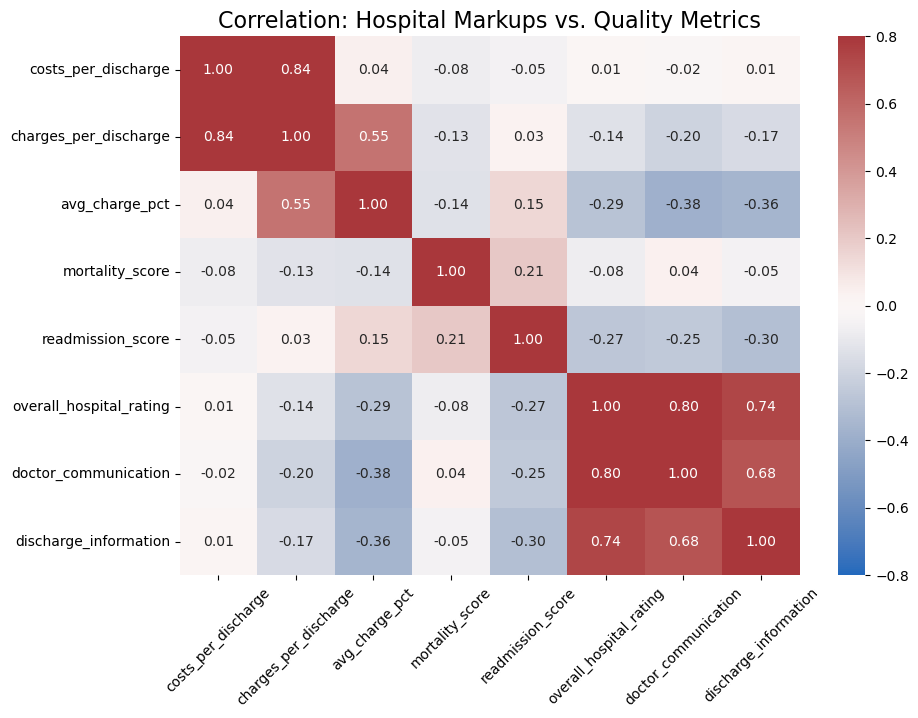

In [167]:
# (From the 'satisfaction_metrics' list)
corr_data = hospitals[['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score', 'overall_hospital_rating', 'doctor_communication', 'discharge_information']].corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_data, 
    annot=True,     # Show the numbers
    cmap='vlag',    # Use a diverging colormap (red/blue)
    fmt='.2f',      # Format to 2 decimal places
    vmin=-0.8,      # Set min/max for color consistency
    vmax=0.8
)
plt.title('Correlation: Hospital Markups vs. Quality Metrics', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('../visualizations/corrheatmap-markup_v_quality.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

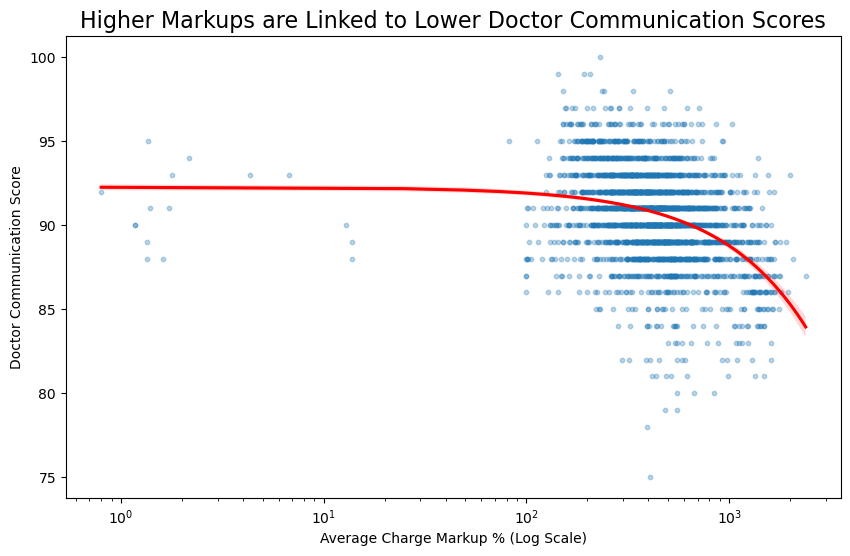

In [171]:
plt.figure(figsize=(10, 6))

# Use a regplot to show the trendline and confidence interval
# We log-scale x for readability, as markup is highly skewed
g = sns.regplot(
    data=hospitals, 
    x='avg_charge_pct', 
    y='doctor_communication',
    line_kws={"color": "red"},
    scatter_kws={'alpha': 0.3, 's': 10} # Make points transparent
)
g.set(xscale="log") # Apply log scale to x-axis
g.set_title('Higher Markups are Linked to Lower Doctor Communication Scores', fontsize=16)
g.set_xlabel('Average Charge Markup % (Log Scale)')
g.set_ylabel('Doctor Communication Score')
plt.savefig('../visualizations/regplot-markup_v_drcomms.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

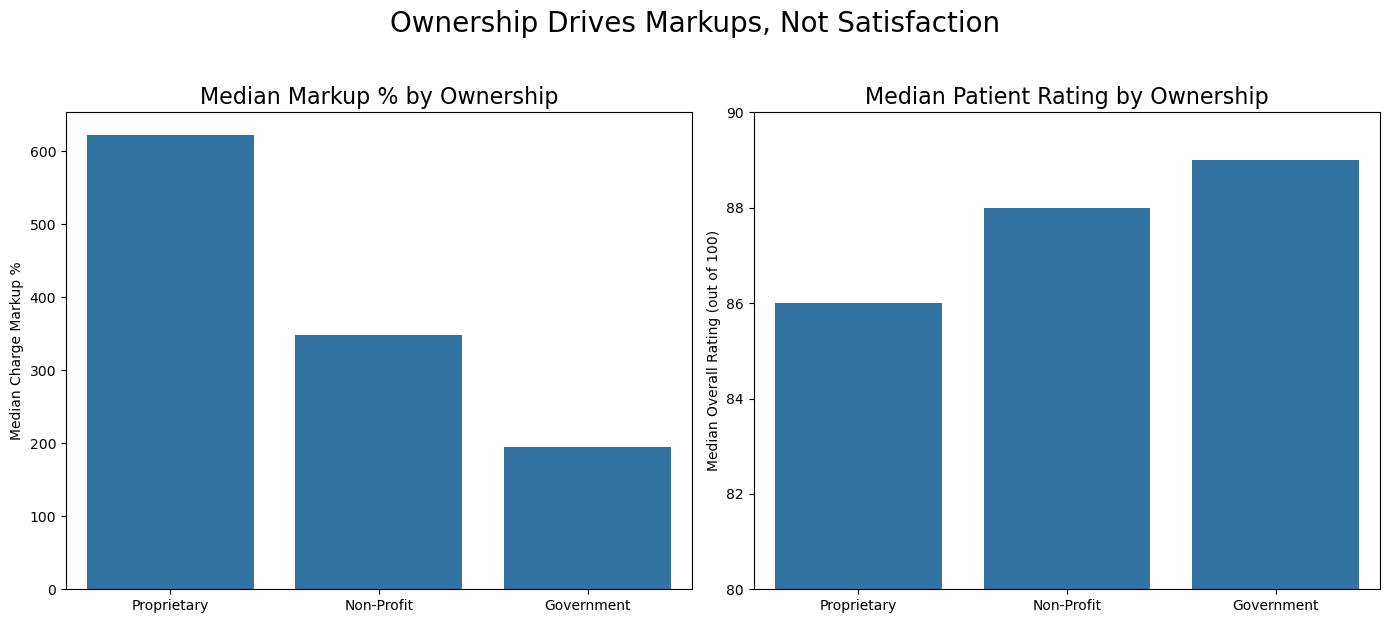

In [173]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 charts

# Chart 1: Markup %
sns.barplot(
    data=ownership_summary.reset_index(), 
    x='general_control', 
    y='median_charge_pct_per_discharge',
    ax=axes[0],
    order=['Proprietary', 'Non-Profit', 'Government'] # Control order
)
axes[0].set_title('Median Markup % by Ownership', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Median Charge Markup %')

# Chart 2: Patient Rating
sns.barplot(
    data=ownership_summary.reset_index(), 
    x='general_control', 
    y='median_overall_rating',
    ax=axes[1],
    order=['Proprietary', 'Non-Profit', 'Government'] # Control order
)
axes[1].set_title('Median Patient Rating by Ownership', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Median Overall Rating (out of 100)')
axes[1].set_ylim(80, 90) # Set Y-axis to emphasize the difference

plt.suptitle('Ownership Drives Markups, Not Satisfaction', fontsize=20, y=1.03)
plt.tight_layout()
plt.savefig('../visualizations/ownershipbarcharts.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

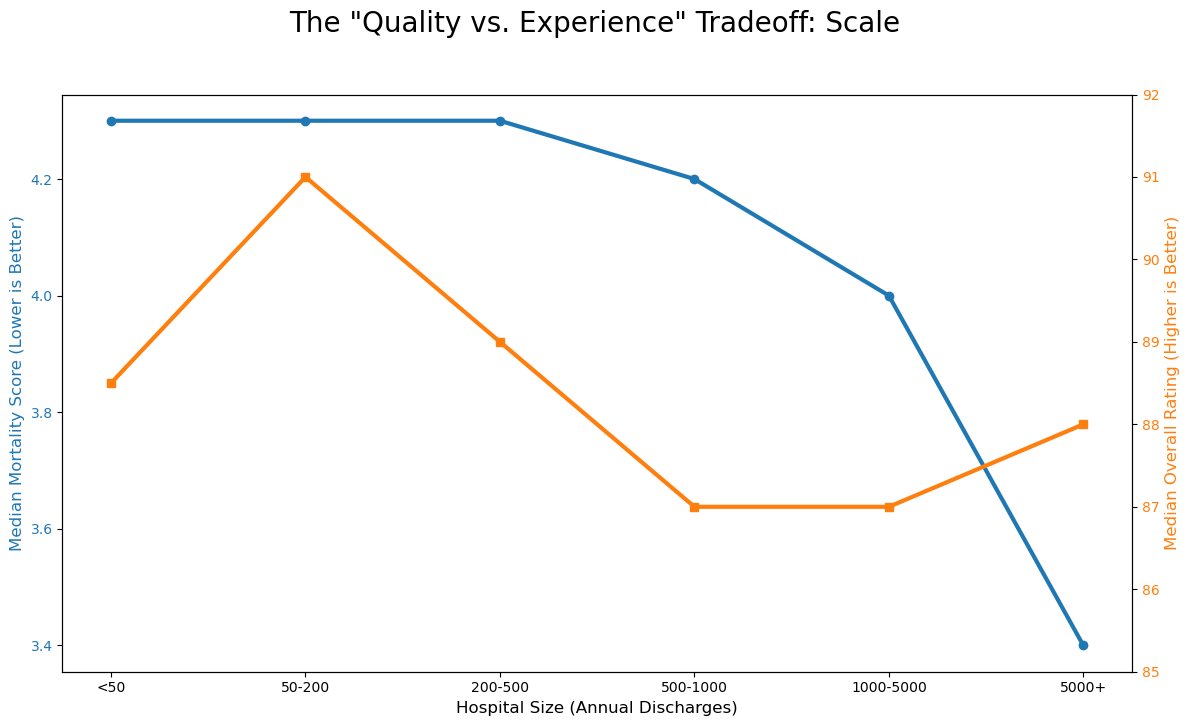

In [177]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# X-axis (shared)
x = size_summary.index

# Y-axis 1 (Left): Mortality
color = 'tab:blue'
ax1.set_xlabel('Hospital Size (Annual Discharges)', fontsize=12)
ax1.set_ylabel('Median Mortality Score (Lower is Better)', color=color, fontsize=12)
ax1.plot(x, size_summary['median_mortality_score'], color=color, marker='o', linewidth=3, label='Mortality Score')
ax1.tick_params(axis='y', labelcolor=color)

# Y-axis 2 (Right): Rating
ax2 = ax1.twinx() # Create a second y-axis
color = 'tab:orange'
ax2.set_ylabel('Median Overall Rating (Higher is Better)', color=color, fontsize=12)
ax2.plot(x, size_summary['median_overall_rating'], color=color, marker='s', linewidth=3, label='Overall Rating')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(85, 92) # Set Y-axis to emphasize the peak

fig.suptitle('The "Quality vs. Experience" Tradeoff: Scale', fontsize=20, y=1.03)
fig.tight_layout()
plt.savefig('../visualizations/mortality_v_rating.png', bbox_inches='tight', pad_inches=0.1)
plt.show()